Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                28        
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 15        
                                                                 
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 217ms/step
[1.0] => 1.08 (expected 1.00)
[4.0] => 1.17 (expected 1.22)
[9.0] => 1.32 (expected 1.37)
[16.0] => 1.51 (expected 1.49)
[25.0] => 1.62 (

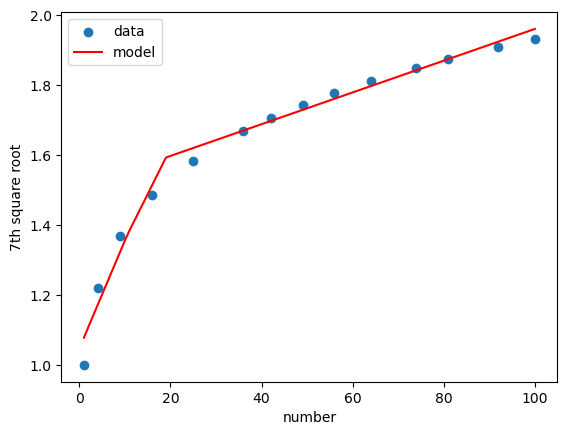

In [1]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.array([[1], [4], [9], [16], [25], [36], [42], [49], [56], [64], [74], [81], [92], [100]])
X = X*1.0
y = np.array([[1], [1.2190136542], [1.3687381066], [1.4859942891], [1.5838196088], 
              [1.668510441], [1.7056611428], [1.7436390343], [1.7772198149], 
              [1.8114473285], [1.8494095794],  [1.8734440046], [1.9078363458], [1.9306977289]])
y = y*1.0

#define keras model
model = Sequential()

model.add(Dense(14,input_dim=1,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)


#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(14):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )
    
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('7th square root')
plt.legend()